<a href="https://colab.research.google.com/github/diegoantunescosta/MachineLearning/blob/main/YOLO_v4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [2]:
import cv2
print(cv2.__version__)

4.4.0


In [1]:
!pip install opencv-python==4.4.0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.4.0


## Etapa 2 - Conectando com o Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [18]:
path = '/content/gdrive/MyDrive/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [19]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [20]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [21]:
len(LABELS)

80

In [22]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [23]:
net = cv2.dnn.readNet(config_path, weights_path)

In [24]:
net

<dnn_Net 0x7fd46e1d0d50>

## Etapa 4 - Definindo mais configurações para a detecção 

In [25]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[132  17 152]
 [241 250 202]
 [180 161 152]
 [ 13  67 235]
 [ 22  32 178]
 [ 16 128  60]
 [237  56 233]
 [189  31  48]
 [ 78 222  17]
 [ 66 148  93]
 [124 207 239]
 [235 117 222]
 [ 24  38  69]
 [149 104  77]
 [137 221 235]
 [173  11  42]
 [ 39  60 176]
 [225 129 213]
 [ 16 167  96]
 [ 12 172 251]
 [ 12   5  51]
 [235 245  41]
 [233 113 107]
 [ 50 167   3]
 [180 153 190]
 [ 26  16  86]
 [205 122 207]
 [ 31 151  12]
 [  1 213 126]
 [  5 201 184]
 [116 189 199]
 [ 26 210 107]
 [224  84 146]
 [ 29   5 171]
 [202 234  93]
 [183  65  70]
 [ 73 156 147]
 [184  47  27]
 [222 220  96]
 [ 48 215 165]
 [154  22 244]
 [209  48 217]
 [140  42  56]
 [189 152 248]
 [117  82 253]
 [114 106  24]
 [202 199 129]
 [251 189 116]
 [137  31 186]
 [105 253  97]
 [ 69  41 202]
 [ 70  22 145]
 [ 92 217 120]
 [205 238 104]
 [ 66 207 120]
 [ 54 210  43]
 [114 122 106]
 [110 238 182]
 [225 201 101]
 [186 233 210]
 [203 241  61]
 [162   7 203]
 [244 124 135]
 [ 74 143 220]
 [236 160 167]
 [247  13  53]
 [ 23  81 

In [26]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [27]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[[327]
 [353]
 [379]]


In [28]:
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [29]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

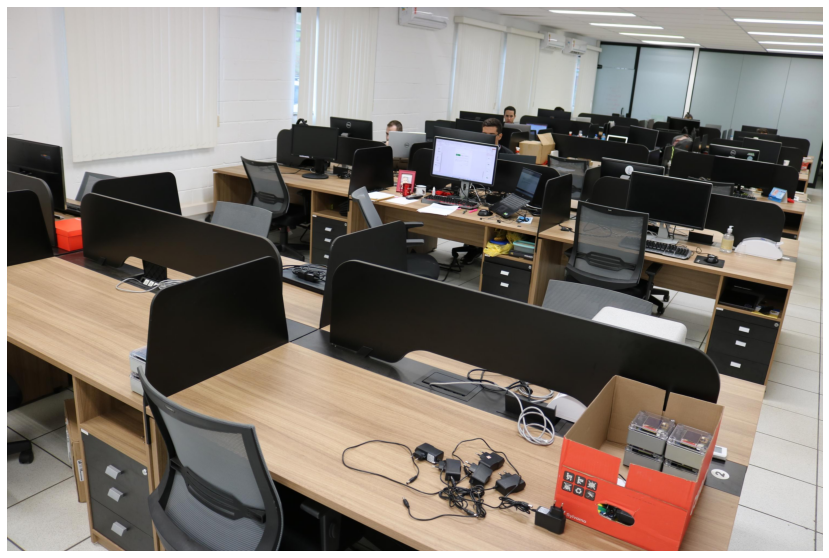

In [32]:
imagem = cv2.imread('/content/gdrive/MyDrive/ciag.png')
mostrar(imagem)

In [33]:
type(imagem)

numpy.ndarray

In [34]:
print(imagem)

[[[187 188 192]
  [187 188 192]
  [187 188 192]
  ...
  [155 166 174]
  [155 166 174]
  [156 167 175]]

 [[187 188 192]
  [187 188 192]
  [187 188 192]
  ...
  [155 166 174]
  [155 166 174]
  [156 167 175]]

 [[187 188 192]
  [187 188 192]
  [187 188 192]
  ...
  [155 166 174]
  [155 166 174]
  [156 167 175]]

 ...

 [[184 189 188]
  [184 189 188]
  [183 188 187]
  ...
  [195 197 197]
  [192 194 194]
  [189 191 191]]

 [[183 188 187]
  [183 188 187]
  [182 187 186]
  ...
  [197 199 199]
  [193 195 195]
  [190 192 192]]

 [[183 188 187]
  [182 187 186]
  [182 187 186]
  ...
  [199 201 201]
  [195 197 197]
  [193 195 195]]]


In [35]:
imagem_cp = imagem.copy()

In [36]:
imagem.shape

(2000, 3000, 3)

In [37]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 2000
Largura: 3000


## Etapa 6 - Processando a imagem de entrada

In [38]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 2.20 segundos


## Etapa 7 - Definindo as variáveis

In [39]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [40]:
len(layer_outputs)

3

In [41]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.00934633, 0.00839005, 0.02196565, ..., 0.        , 0.        ,
         0.        ],
        [0.01390904, 0.0155364 , 0.03450248, ..., 0.        , 0.        ,
         0.        ],
        [0.01635895, 0.01439785, 0.06108469, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.99141943, 0.99063927, 0.01931013, ..., 0.        , 0.        ,
         0.        ],
        [0.986255  , 0.9838281 , 0.02885197, ..., 0.        , 0.        ,
         0.        ],
        [0.98303646, 0.9852032 , 0.05313373, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 8112)

In [42]:
layer_outputs[1]

array([[0.02915491, 0.03285787, 0.08188482, ..., 0.        , 0.        ,
        0.        ],
       [0.03135719, 0.03306092, 0.12457322, ..., 0.        , 0.        ,
        0.        ],
       [0.02932216, 0.03476289, 0.13484411, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9680566 , 0.9661293 , 0.06906924, ..., 0.        , 0.        ,
        0.        ],
       [0.96451783, 0.96687376, 0.09214634, ..., 0.        , 0.        ,
        0.        ],
       [0.96609277, 0.96688485, 0.10599883, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [43]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.0629682 , 0.06345567, 0.28581774, ..., 0.        , 0.        ,
         0.        ],
        [0.05355665, 0.05614471, 0.5034013 , ..., 0.        , 0.        ,
         0.        ],
        [0.04775524, 0.05127975, 0.81136566, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9343274 , 0.9320064 , 0.23683551, ..., 0.        , 0.        ,
         0.        ],
        [0.9335206 , 0.9302568 , 0.30608267, ..., 0.        , 0.        ,
         0.        ],
        [0.9507433 , 0.9488746 , 0.570052  , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.2968202e-02, 6.3455671e-02, 2.8581774e-01, 4.8268339e-01,
        7.0970032e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [44]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [45]:
LABELS[16]

'dog'

In [46]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [47]:
teste = np.array([0.10, 0.80, 0.10])

In [48]:
teste[1]

0.8

In [49]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.5597362
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 62
confiança: 0.5597362
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.

In [50]:
print(caixas), len(caixas)

[[1183, 406, 164, 80], [999, 433, 215, 156], [1001, 433, 214, 156], [1555, 476, 255, 176], [1556, 476, 253, 176], [2277, 609, 312, 213], [2278, 610, 310, 214], [2143, 1104, 367, 135], [2142, 1104, 370, 135], [993, 430, 222, 159], [994, 430, 224, 162], [1557, 469, 249, 189], [1558, 469, 249, 192], [861, 545, 238, 356], [862, 543, 237, 359], [858, 543, 244, 363], [2279, 608, 307, 217], [2282, 610, 302, 218], [2, 655, 174, 317], [0, 655, 175, 320], [2561, 692, 300, 194], [2047, 711, 318, 340], [2048, 710, 315, 341], [2049, 709, 313, 345], [1119, 789, 360, 289], [1118, 789, 362, 289], [1120, 788, 358, 291], [496, 912, 548, 530], [496, 912, 548, 530], [496, 914, 545, 528], [2156, 1098, 347, 150], [2154, 1098, 349, 150], [491, 1318, 557, 685], [491, 1317, 560, 688], [488, 1314, 567, 689], [491, 1324, 732, 678], [496, 1323, 725, 677], [475, 920, 585, 512], [491, 1287, 605, 725], [488, 1287, 622, 724]]


(None, 40)

In [51]:
print(confiancas), len(confiancas)

[0.5597361922264099, 0.7811244130134583, 0.783842921257019, 0.9321791529655457, 0.9377042651176453, 0.6618883013725281, 0.6673070788383484, 0.8793783187866211, 0.881573498249054, 0.8009755611419678, 0.7031038999557495, 0.9770684838294983, 0.971245288848877, 0.77183598279953, 0.7678635120391846, 0.6265905499458313, 0.7154915928840637, 0.703687846660614, 0.5749492049217224, 0.5627664923667908, 0.5277689695358276, 0.6723504066467285, 0.6955439448356628, 0.6766690015792847, 0.585563600063324, 0.576994776725769, 0.5819445252418518, 0.7878827452659607, 0.7806724905967712, 0.770438551902771, 0.8661725521087646, 0.8612509369850159, 0.5414637923240662, 0.5955939292907715, 0.6073088645935059, 0.7539751529693604, 0.7437943816184998, 0.8055211305618286, 0.9047017097473145, 0.8836546540260315]


(None, 40)

In [52]:
print(IDclasses), len(IDclasses)

[62, 62, 62, 62, 62, 62, 62, 56, 56, 62, 62, 62, 62, 56, 56, 56, 62, 62, 56, 56, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]


(None, 40)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [53]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [54]:
objs

array([[11],
       [38],
       [ 8],
       [37],
       [ 9],
       [13],
       [16],
       [22],
       [24],
       [18],
       [ 0],
       [20]], dtype=int32)

In [55]:
print(objs.flatten())

[11 38  8 37  9 13 16 22 24 18  0 20]


In [56]:
confiancas[7], confiancas[15], confiancas[11]

(0.8793783187866211, 0.6265905499458313, 0.9770684838294983)

In [57]:
confiancas[0]

0.5597361922264099

## Etapa 10 - Mostrando o resultado da detecção na imagem

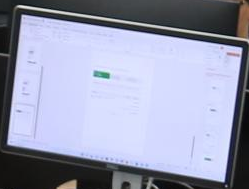

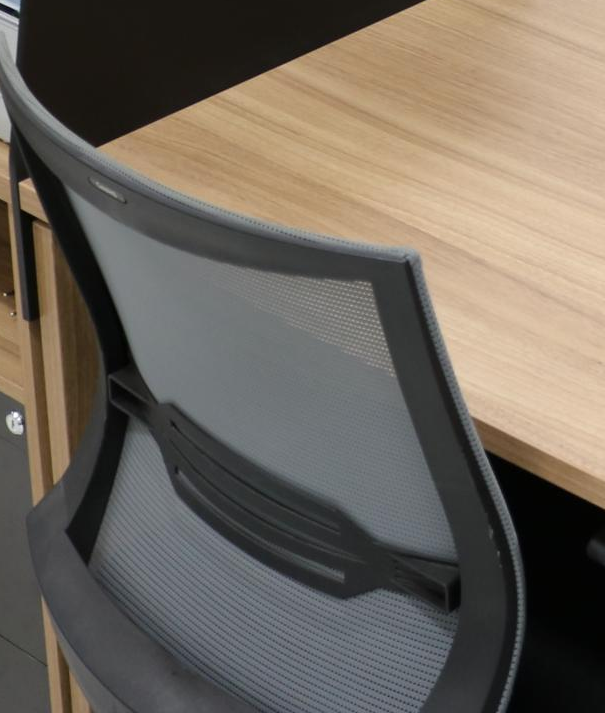

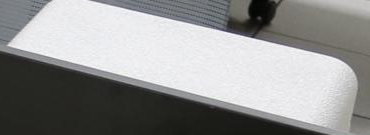

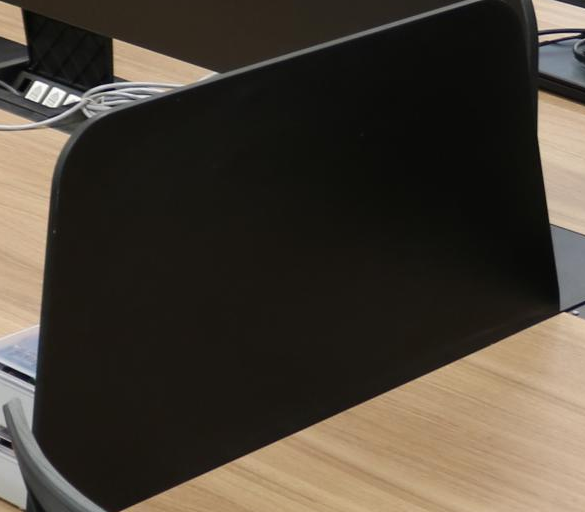

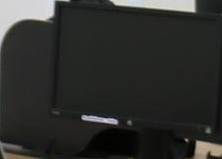

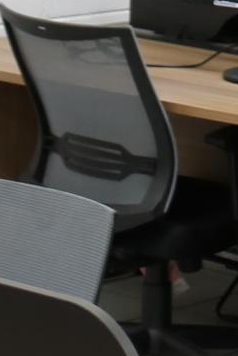

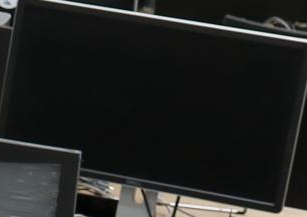

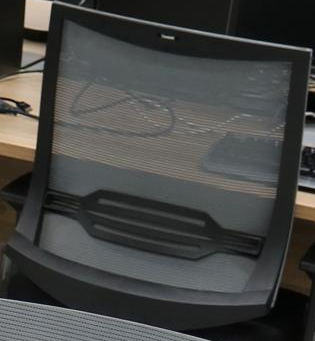

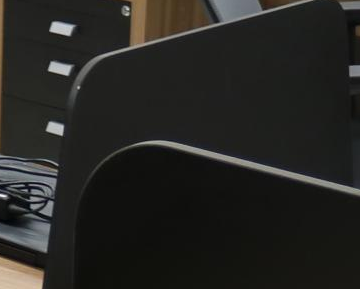

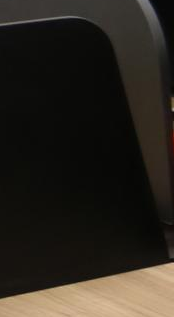

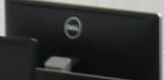

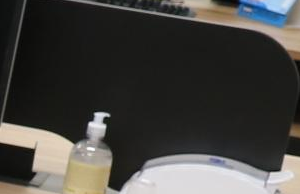

In [58]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

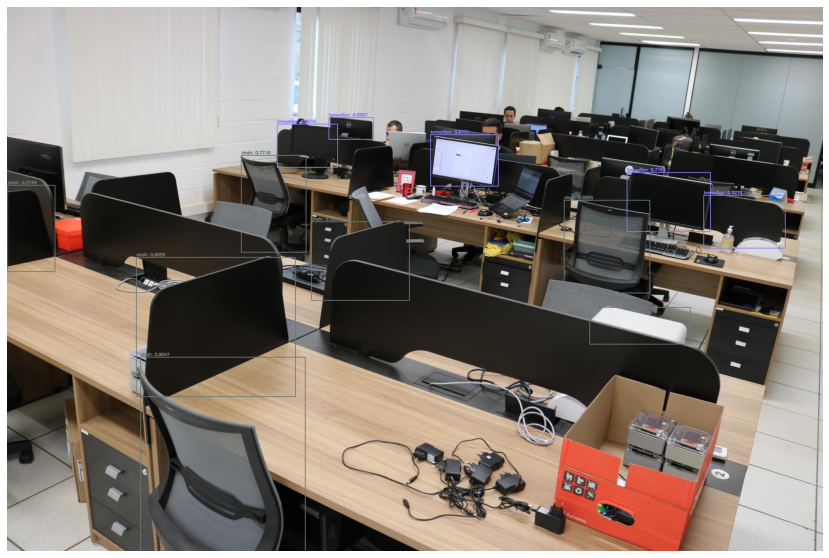

In [59]:
mostrar(imagem)

In [60]:
cv2.imwrite('resultado.jpg', imagem)

True

In [65]:
!cp ./ciag.jpg /content/gdrive/MyDriver/ciag.png


cp: cannot stat './ciag.jpg': No such file or directory
